In [11]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:
%pwd

'c:\\Users\\yashr\\OneDrive\\Desktop\\Football Analysis CV\\Football-Analysis-system-with-YOLO\\research'

In [13]:
os.chdir("..")


In [14]:
%pwd

'c:\\Users\\yashr\\OneDrive\\Desktop\\Football Analysis CV\\Football-Analysis-system-with-YOLO'

In [15]:
from utils.video_utils import read_video,write_video
from trackers.tracker import Tracker

In [16]:
# main()
video_frames = read_video("input_videos/08fd33_4.mp4")

# Initialize tracker
tracker = Tracker("models/best.pt")
tracks = tracker.get_object_tracks(video_frames,read_from_stub=True,stub_path='stubs/track_stubs.pkl')

In [17]:
#save cropped image of the player 

for track_id,player in tracks['players'][0].items():
    bbox = player['bbox']
    frame = video_frames[0]

    # crop bbox from frame

    cropped_image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]

    # save the cropped image
    cv2.imwrite(f'output_videos/cropped_image.jpg',cropped_image)
    break

In [18]:
image_path = 'output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


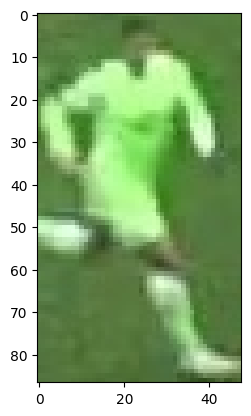

In [20]:
plt.imshow(image)
plt.show()

### Take Top half of the image

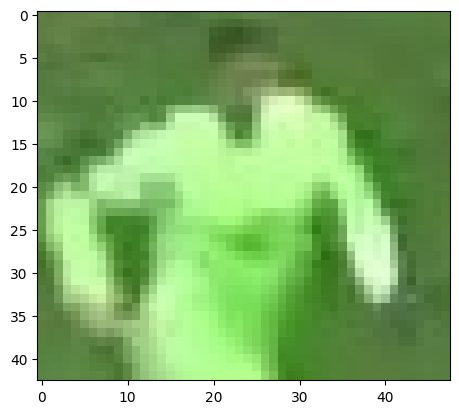

In [21]:
top_half_image = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)

In [22]:
### cluster the image into 2 clusters

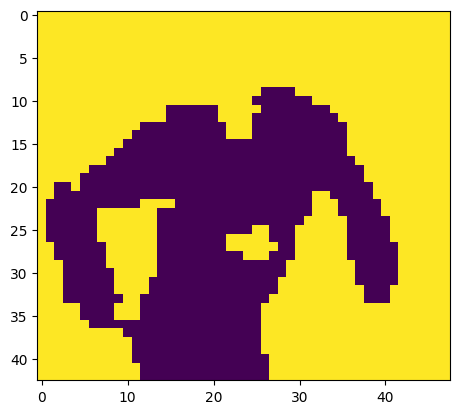

In [24]:
# reshape the image into 2D array
image_2d = top_half_image.reshape(-1,3)

# Perform k-means clustering

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the label into original image shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()


In [25]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key = corner_clusters.count)

print(non_player_cluster)

1


In [26]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [27]:
kmeans.cluster_centers_[player_cluster]

array([     171.11,       235.4,      142.53])